# Introducing:

## Context:
As a financial institution regulated by the FCA, %Company name% has the obligation to verify the identity of all customers who want to open a %Company name% account. Each prospective customer has to go through a Know Your Customer (KYC) process by submitting a government-issued photo ID and a facial picture of themselves to our partner, Veritas. Veritas then would perform 2 checks:

• Document check: To verify that the photo ID is valid and authentic; • Facial Similarity check: To verify that the face in the picture is the same with that on the submitted ID.

The customer will ‘pass’ the KYC process and get onboarded if the results of both Document and Facial Similarity checks are ‘clear’. If the result of any check is not ‘clear’, the customer has to submit all the photos again.

The “pass rate” is defined as the number of customers who pass both the KYC process divided by the number of customers who attempt the process. Each customer has up to 2 attempts. The pass rate has decreased substantially in the recent period. 

## Task:

Please write a report that outlines the root causes and suggest solutions.

## Used libraries:
- pandas
- numpy
- matplotlib
- phik

In [53]:
import pandas as pd
import numpy as np
import phik

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Data preparation

## Read data

In [54]:
doc = pd.read_csv('/home/antonius/Projects/DS_Projects/Data-analysis-python-pandas/3_fintech_testcase/data/doc_reports_sample.csv')
face = pd.read_csv('/home/antonius/Projects/DS_Projects/Data-analysis-python-pandas/3_fintech_testcase/data/face_reports_sample.csv')

In [55]:
doc.head(2)

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,27241,8190909e566647a5b6afeee9b4ec6c6a,clear,clear,clear,clear,clear,2017-05-25 08:38:56,clear,NaN,NaN,clear,NaN,clear,30e11e95e30748f485a2271ca5e6abb8,clear,NaN,"{'gender': 'Female', 'document_type': 'driving_licence', 'date_of_expiry': '2023-12-05', 'issuing_country': 'GBR'}",clear
1,28369,6b62136dfde348a99855e350294aaf5d,clear,clear,clear,clear,clear,2017-05-31 08:12:51,clear,NaN,NaN,clear,NaN,clear,4c0bfde8eb2249ed820e1f61d3ec3e33,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_licence', 'date_of_expiry': '2020-05-13', 'issuing_country': 'GBR'}",clear


In [56]:
face.head(2)

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,58,ecee468d4a124a8eafeec61271cd0da1,clear,clear,2017-06-20 17:50:43,clear,clear,{},9e4277fc1ddf4a059da3dd2db35f6c76
1,76,1895d2b1782740bb8503b9bf3edf1ead,clear,clear,2017-06-20 13:28:00,clear,clear,{},ab259d3cb33b4711b0a5174e4de1d72c


In [57]:
len(doc)

5880

## Format data

In [58]:
df = doc.merge(face,how='inner',on=['user_id','attempt_id'],suffixes=['_d','_f'])

In [59]:
df.head(2)

,Unnamed: 0_d,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,...,compromised_document_result,properties_d,sub_result,Unnamed: 0_f,result_f,face_comparison_result,created_at_f,facial_image_integrity_result,visual_authenticity_result_f,properties_f
0,27241,8190909e566647a5b6afeee9b4ec6c6a,clear,clear,clear,clear,clear,2017-05-25 08:38:56,clear,NaN,...,NaN,"{'gender': 'Female', 'document_type': 'driving_licence', 'date_of_expiry': '2023-12-05', 'issuing_country': 'GBR'}",clear,27241,consider,consider,2017-05-25 08:38:56,clear,clear,{'score': 0.42}
1,28369,6b62136dfde348a99855e350294aaf5d,clear,clear,clear,clear,clear,2017-05-31 08:12:51,clear,NaN,...,NaN,"{'gender': 'Male', 'document_type': 'driving_licence', 'date_of_expiry': '2020-05-13', 'issuing_country': 'GBR'}",clear,28369,clear,clear,2017-05-31 08:12:51,clear,clear,{'score': 0.61}


In [60]:
df['created_at_d'] = pd.to_datetime(df['created_at_d'],format='%Y-%m-%d %H:%M:%S')

In [61]:
df['month'] = df['created_at_d'].values.astype('datetime64[M]')

In [62]:
df = df.replace('clear',1).replace('consider',0).copy()

In [63]:
df['sub_result'].value_counts()

1            4406
rejected      889
caution       525
suspected      60
Name: sub_result, dtype: int64

In [64]:
df['sub_result'] = df['sub_result'].replace('rejected',0).replace('caution',0).replace('suspected',0)

In [65]:
df.head(2)

,Unnamed: 0_d,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,...,properties_d,sub_result,Unnamed: 0_f,result_f,face_comparison_result,created_at_f,facial_image_integrity_result,visual_authenticity_result_f,properties_f,month
0,27241,8190909e566647a5b6afeee9b4ec6c6a,1,1.0,1,1.0,1,2017-05-25 08:38:56,1,NaN,...,"{'gender': 'Female', 'document_type': 'driving_licence', 'date_of_expiry': '2023-12-05', 'issuing_country': 'GBR'}",1,27241,0,0.0,2017-05-25 08:38:56,1.0,1.0,{'score': 0.42},2017-05-01
1,28369,6b62136dfde348a99855e350294aaf5d,1,1.0,1,1.0,1,2017-05-31 08:12:51,1,NaN,...,"{'gender': 'Male', 'document_type': 'driving_licence', 'date_of_expiry': '2020-05-13', 'issuing_country': 'GBR'}",1,28369,1,1.0,2017-05-31 08:12:51,1.0,1.0,{'score': 0.61},2017-05-01


In [66]:
df[df['user_id'] == 'e96cd0bcab7c4dfbb6b9294f17afc577']

,Unnamed: 0_d,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,...,properties_d,sub_result,Unnamed: 0_f,result_f,face_comparison_result,created_at_f,facial_image_integrity_result,visual_authenticity_result_f,properties_f,month
2954,104370,e96cd0bcab7c4dfbb6b9294f17afc577,0,1.0,0,1.0,1,2017-09-19 20:43:47,1,0.0,...,"{'gender': 'Female', 'nationality': 'ESP', 'document_type': 'passport', 'date_of_expiry': '2026-12-27', 'issuing_country': 'ESP'}",0,104370,1,1.0,2017-09-19 20:43:47,1.0,1.0,{},2017-09-01
3853,104344,e96cd0bcab7c4dfbb6b9294f17afc577,0,1.0,0,1.0,1,2017-09-19 20:27:06,1,0.0,...,"{'gender': 'Female', 'nationality': 'ESP', 'document_type': 'passport', 'date_of_expiry': '2026-12-27', 'issuing_country': 'ESP'}",0,104344,1,1.0,2017-09-19 20:27:06,1.0,1.0,{},2017-09-01


In [67]:
df['sub_result'].value_counts()

1    4406
0    1474
Name: sub_result, dtype: int64

In [68]:
two_att = df['user_id'].value_counts().to_frame().query('user_id > 1').reset_index()['index']

In [69]:
pd.options.display.max_rows = 100

In [70]:
pd.set_option('display.max_colwidth', None)


In [71]:
df[df['user_id'].isin(two_att)].sort_values('user_id')[['user_id','properties_d']]

,user_id,properties_d
2989,0a743f7f87884a51bd8c165e0d3e70ed,{}
3755,0a743f7f87884a51bd8c165e0d3e70ed,{}
3367,0b3fe48a14554fa687e5152a1c20d768,"{'gender': 'Male', 'nationality': 'BEL', 'document_type': 'national_identity_card', 'date_of_expiry': '2026-05-28', 'issuing_country': 'BEL'}"
2914,0b3fe48a14554fa687e5152a1c20d768,"{'gender': 'Male', 'nationality': 'BEL', 'document_type': 'national_identity_card', 'date_of_expiry': '2026-05-28', 'issuing_country': 'BEL'}"
1588,0b677d16a072467eb95dd396e25840d9,{}
1542,0b677d16a072467eb95dd396e25840d9,"{'gender': 'Male', 'nationality': 'TWN', 'document_type': 'passport', 'date_of_expiry': '2024-06-26', 'issuing_country': 'TWN'}"
3483,0be42f25621d46739d902fda1abfb67c,"{'gender': 'Male', 'issuing_date': '2015-05', 'document_type': 'national_identity_card', 'issuing_country': 'FRA'}"
3848,0be42f25621d46739d902fda1abfb67c,"{'issuing_date': '2011-10-24', 'document_type': 'driving_licence', 'issuing_country': 'FRA'}"
5823,12028371d6c943babadf18224ebe96cb,"{'gender': 'Male', 'issuing_date': '2016-06-23', 'document_type': 'driving_licence', 'date_of_expiry': '2021-04-21', 'issuing_country': 'GBR'}"
5496,12028371d6c943babadf18224ebe96cb,{}


In [72]:
df[~df['user_id'].isin(two_att)]['user_id'].agg(['count','nunique'])

count      5816
nunique    5816
Name: user_id, dtype: int64

In [73]:
df = df[~df['user_id'].isin(two_att)].copy()

In [74]:
df['user_id'].agg(['count','nunique'])

count      5816
nunique    5816
Name: user_id, dtype: int64

In [75]:
df['pass_rate'] = (df[['result_d','result_f']].sum(axis=1) == 2)*1

# Analysis

In [76]:
df.groupby('month')['pass_rate'].agg(['count','mean'])

,count,mean
month,,
2017-05-01,58,0.827586
2017-06-01,270,0.914815
2017-07-01,1123,0.846839
2017-08-01,1219,0.791632
2017-09-01,1232,0.703734
2017-10-01,1914,0.591432


In [77]:
(df.groupby('month')['pass_rate']
.agg(['count', 'mean'])
.style
.highlight_between(left=0, right=0.75, subset='mean', color='red' )
.highlight_between(left=0.75, right=0.9, subset='mean', color='orange' )
.highlight_between(left=0.9, right=1, subset='mean', color='green' )
 

.highlight_between(left=1000, right=3000, subset='count', color='blue' )



.format({
    'mean': '{:,.2%}'.format,
    'count': '{}'.format,
})
)

,count,mean
month,,
2017-05-01 00:00:00,58,82.76%
2017-06-01 00:00:00,270,91.48%
2017-07-01 00:00:00,1123,84.68%
2017-08-01 00:00:00,1219,79.16%
2017-09-01 00:00:00,1232,70.37%
2017-10-01 00:00:00,1914,59.14%


In [78]:
df.columns

Index(['Unnamed: 0_d', 'user_id', 'result_d', 'visual_authenticity_result_d',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_d', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties_d', 'sub_result',
       'Unnamed: 0_f', 'result_f', 'face_comparison_result', 'created_at_f',
       'facial_image_integrity_result', 'visual_authenticity_result_f',
       'properties_f', 'month', 'pass_rate'],
      dtype='object')

In [79]:
flags = ['pass_rate','result_d', 'visual_authenticity_result_d',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result',  'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result',  'police_record_result',
       'compromised_document_result', 'sub_result',
        'result_f', 'face_comparison_result',
       'facial_image_integrity_result', 'visual_authenticity_result_f']

In [80]:
face_col = ['result_f', 'face_comparison_result',
       'facial_image_integrity_result', 'visual_authenticity_result_f']

In [81]:
df[flags].isna().mean().sort_values(ascending=False).reset_index()

,index,0
0,data_comparison_result,0.985385
1,compromised_document_result,0.739856
2,data_consistency_result,0.484869
3,colour_picture_result,0.464580
4,conclusive_document_quality_result,0.464580
5,data_validation_result,0.192228
6,police_record_result,0.183631
7,face_detection_result,0.149759
8,visual_authenticity_result_f,0.149587
9,visual_authenticity_result_d,0.149587


In [82]:
df[['conclusive_document_quality_result','image_integrity_result']].isna().mean().reset_index()

,index,0
0,conclusive_document_quality_result,0.46458
1,image_integrity_result,0.00000


In [83]:
df[df['month']>='2017-07-01'].groupby('month')[face_col].agg(['count','mean'])

result_f           face_comparison_result            \
              count      mean                  count      mean   
month                                                            
2017-07-01     1123  0.916296                   1037  0.992285   
2017-08-01     1219  0.921247                   1124  0.999110   
2017-09-01     1232  0.935065                   1155  0.997403   
2017-10-01     1914  0.966040                   1852  0.998380   

           facial_image_integrity_result            \
                                   count      mean   
month                                                
2017-07-01                          1123  0.923419   
2017-08-01                          1219  0.922067   
2017-09-01                          1224  0.943627   
2017-10-01                          1903  0.973200   

           visual_authenticity_result_f            
                                  count      mean  
month                                              
2017-07-01                         1027  0.983447  
2017-08-01                         1057  0.973510  
2017-09-01                         1022  0.979452  
2017-10-01                         1513  0.982816

In [84]:
df.groupby('month')['pass_rate'].agg(['count','mean'])

,count,mean
month,,
2017-05-01,58,0.827586
2017-06-01,270,0.914815
2017-07-01,1123,0.846839
2017-08-01,1219,0.791632
2017-09-01,1232,0.703734
2017-10-01,1914,0.591432


In [85]:
df.columns

Index(['Unnamed: 0_d', 'user_id', 'result_d', 'visual_authenticity_result_d',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_d', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties_d', 'sub_result',
       'Unnamed: 0_f', 'result_f', 'face_comparison_result', 'created_at_f',
       'facial_image_integrity_result', 'visual_authenticity_result_f',
       'properties_f', 'month', 'pass_rate'],
      dtype='object')

In [86]:
flags = ['pass_rate','result_d', 'visual_authenticity_result_d',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result',  'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result',  'police_record_result',
       'compromised_document_result', 'sub_result',
        'result_f', 'face_comparison_result',
       'facial_image_integrity_result', 'visual_authenticity_result_f']

In [87]:
face_col = ['result_f', 'face_comparison_result',
       'facial_image_integrity_result', 'visual_authenticity_result_f']

In [88]:
df[flags].isna().mean()

pass_rate                             0.000000
result_d                              0.000000
visual_authenticity_result_d          0.149587
image_integrity_result                0.000000
face_detection_result                 0.149759
image_quality_result                  0.000000
supported_document_result             0.001891
conclusive_document_quality_result    0.464580
colour_picture_result                 0.464580
data_validation_result                0.192228
data_consistency_result               0.484869
data_comparison_result                0.985385
police_record_result                  0.183631
compromised_document_result           0.739856
sub_result                            0.000000
result_f                              0.000000
face_comparison_result                0.058116
facial_image_integrity_result         0.003267
visual_authenticity_result_f          0.149587
dtype: float64

In [89]:
df[df['month']>='2017-07-01'].groupby('month')[flags].agg(['count','mean'])

pass_rate           result_d            \
               count      mean    count      mean   
month                                               
2017-07-01      1123  0.846839     1123  0.894034   
2017-08-01      1219  0.791632     1219  0.830189   
2017-09-01      1232  0.703734     1232  0.725649   
2017-10-01      1914  0.591432     1914  0.600836   

           visual_authenticity_result_d           image_integrity_result  \
                                  count      mean                  count   
month                                                                      
2017-07-01                         1027  0.983447                   1123   
2017-08-01                         1057  0.973510                   1219   
2017-09-01                         1022  0.979452                   1232   
2017-10-01                         1513  0.982816                   1914   

                     face_detection_result            ... sub_result  \
                mean                 count      mean  ...      count   
month                                                 ...              
2017-07-01  0.914515                  1027  1.000000  ...       1123   
2017-08-01  0.857260                  1057  0.993377  ...       1219   
2017-09-01  0.748377                  1021  0.991185  ...       1232   
2017-10-01  0.621735                  1513  0.996034  ...       1914   

                     result_f           face_comparison_result            \
                mean    count      mean                  count      mean   
month                                                                      
2017-07-01  0.894034     1123  0.916296                   1037  0.992285   
2017-08-01  0.830189     1219  0.921247                   1124  0.999110   
2017-09-01  0.725649     1232  0.935065                   1155  0.997403   
2017-10-01  0.600836     1914  0.966040                   1852  0.998380   

           facial_image_integrity_result            \
                                   count      mean   
month                                                
2017-07-01                          1123  0.923419   
2017-08-01                          1219  0.922067   
2017-09-01                          1224  0.943627   
2017-10-01                          1903  0.973200   

           visual_authenticity_result_f            
                                  count      mean  
month                                              
2017-07-01                         1027  0.983447  
2017-08-01                         1057  0.973510  
2017-09-01                         1022  0.979452  
2017-10-01                         1513  0.982816  

[4 rows x 34 columns]

In [90]:
df[df['month']>='2017-07-01'].groupby('month')[flags].agg(['count','mean'])[['pass_rate','result_f']]

pass_rate           result_f          
               count      mean    count      mean
month                                            
2017-07-01      1123  0.846839     1123  0.916296
2017-08-01      1219  0.791632     1219  0.921247
2017-09-01      1232  0.703734     1232  0.935065
2017-10-01      1914  0.591432     1914  0.966040

In [91]:
df[df['month']>='2017-07-01'].groupby('month')[flags].agg(['count','mean'])[['pass_rate','conclusive_document_quality_result']]

pass_rate           conclusive_document_quality_result          
               count      mean                              count      mean
month                                                                      
2017-07-01      1123  0.846839                                  0       NaN
2017-08-01      1219  0.791632                                579  0.982729
2017-09-01      1232  0.703734                               1022  0.902153
2017-10-01      1914  0.591432                               1513  0.786517

In [92]:
df[df['month']>='2017-07-01'].groupby('month')[flags].agg(['mean']).corr()['pass_rate'].sort_values('mean')

,,mean
result_f,mean,-0.979533
facial_image_integrity_result,mean,-0.969826
colour_picture_result,mean,-0.828787
face_comparison_result,mean,-0.600351
visual_authenticity_result_d,mean,-0.243417
visual_authenticity_result_f,mean,-0.243417
data_consistency_result,mean,0.157426
face_detection_result,mean,0.346018
data_validation_result,mean,0.756341
conclusive_document_quality_result,mean,0.999471


In [93]:
doc.columns

Index(['Unnamed: 0', 'user_id', 'result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties', 'sub_result'],
      dtype='object')

In [94]:
face.columns

Index(['Unnamed: 0', 'user_id', 'result', 'face_comparison_result',
       'created_at', 'facial_image_integrity_result',
       'visual_authenticity_result', 'properties', 'attempt_id'],
      dtype='object')

In [95]:
df[['conclusive_document_quality_result','image_integrity_result']].isna().mean()

conclusive_document_quality_result    0.46458
image_integrity_result                0.00000
dtype: float64

In [96]:
(df[df['month']>='2017-07-01']
 .groupby('month')[flags]
 .agg(['count','mean'])
 [['pass_rate','conclusive_document_quality_result',
   'image_integrity_result']])

pass_rate           conclusive_document_quality_result            \
               count      mean                              count      mean   
month                                                                         
2017-07-01      1123  0.846839                                  0       NaN   
2017-08-01      1219  0.791632                                579  0.982729   
2017-09-01      1232  0.703734                               1022  0.902153   
2017-10-01      1914  0.591432                               1513  0.786517   

           image_integrity_result            
                            count      mean  
month                                        
2017-07-01                   1123  0.914515  
2017-08-01                   1219  0.857260  
2017-09-01                   1232  0.748377  
2017-10-01                   1914  0.621735

In [97]:
df[df['month']>='2017-07-01'].groupby('month')[face_col].agg(['count','mean'])

result_f           face_comparison_result            \
              count      mean                  count      mean   
month                                                            
2017-07-01     1123  0.916296                   1037  0.992285   
2017-08-01     1219  0.921247                   1124  0.999110   
2017-09-01     1232  0.935065                   1155  0.997403   
2017-10-01     1914  0.966040                   1852  0.998380   

           facial_image_integrity_result            \
                                   count      mean   
month                                                
2017-07-01                          1123  0.923419   
2017-08-01                          1219  0.922067   
2017-09-01                          1224  0.943627   
2017-10-01                          1903  0.973200   

           visual_authenticity_result_f            
                                  count      mean  
month                                              
2017-07-01                         1027  0.983447  
2017-08-01                         1057  0.973510  
2017-09-01                         1022  0.979452  
2017-10-01                         1513  0.982816

In [102]:
df.groupby('month')['pass_rate'].agg(['count','mean'])

,count,mean
month,,
2017-05-01,58,0.827586
2017-06-01,270,0.914815
2017-07-01,1123,0.846839
2017-08-01,1219,0.791632
2017-09-01,1232,0.703734
2017-10-01,1914,0.591432


In [103]:
eval('1+1')

2

In [104]:
type(eval("{'a':1,'b':2}"))

dict

In [105]:
df = pd.concat([df,df['properties_d'].apply(eval).apply(pd.Series)],axis=1)

In [106]:
df.pivot_table(index='document_type',columns='month',values='pass_rate',aggfunc=['count','mean'])

count                                              \
month                  2017-05-01 2017-06-01 2017-07-01 2017-08-01 2017-09-01   
document_type                                                                   
driving_licence              21.0       95.0      365.0      326.0      322.0   
national_identity_card       18.0       87.0      342.0      365.0      389.0   
passport                     19.0       87.0      304.0      338.0      276.0   
residence_permit              NaN        NaN       16.0       28.0       34.0   

                                        mean                                   \
month                  2017-10-01 2017-05-01 2017-06-01 2017-07-01 2017-08-01   
document_type                                                                   
driving_licence             551.0   0.857143   0.884211   0.917808   0.898773   
national_identity_card      549.0   0.777778   0.919540   0.938596   0.934247   
passport                    395.0   0.842105   0.954023   0.921053   0.899408   
residence_permit             18.0        NaN        NaN   0.937500   0.964286   

                                              
month                  2017-09-01 2017-10-01  
document_type                                 
driving_licence          0.850932   0.754991  
national_identity_card   0.868895   0.834244  
passport                 0.811594   0.620253  
residence_permit         0.882353   0.722222

In [107]:
df.pivot_table(index='document_type',columns='month',values='pass_rate',aggfunc=['mean'])

mean                                              \
month                  2017-05-01 2017-06-01 2017-07-01 2017-08-01 2017-09-01   
document_type                                                                   
driving_licence          0.857143   0.884211   0.917808   0.898773   0.850932   
national_identity_card   0.777778   0.919540   0.938596   0.934247   0.868895   
passport                 0.842105   0.954023   0.921053   0.899408   0.811594   
residence_permit              NaN        NaN   0.937500   0.964286   0.882353   

                                   
month                  2017-10-01  
document_type                      
driving_licence          0.754991  
national_identity_card   0.834244  
passport                 0.620253  
residence_permit         0.722222

<AxesSubplot: xlabel='None,month'>

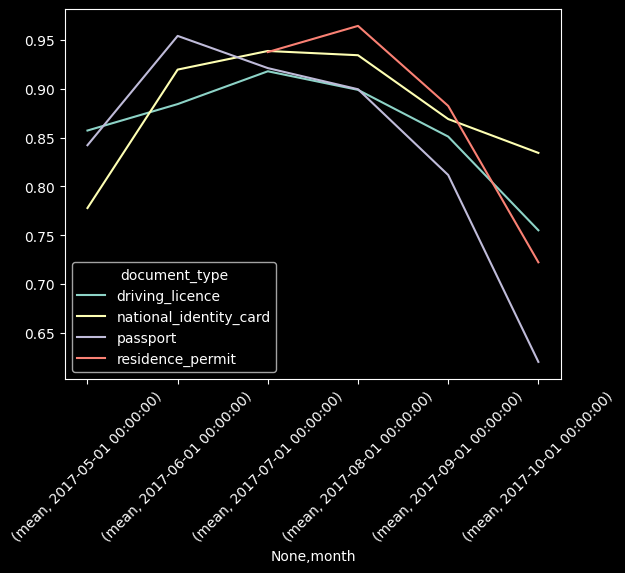

In [108]:
df.pivot_table(index='document_type',columns='month',values='pass_rate',aggfunc=['mean']).T.plot(rot=45)

In [109]:
top10_countries = df['issuing_country'].value_counts().head(10).index

In [110]:
(df[df['issuing_country'].isin(df['issuing_country'].value_counts().head(5).index)]
 .pivot_table(index='issuing_country',columns='month',values='pass_rate',aggfunc=['count','mean']))

count                                              \
month           2017-05-01 2017-06-01 2017-07-01 2017-08-01 2017-09-01   
issuing_country                                                          
ESP                      4         15         69         91         78   
FRA                      8         36        161        180        158   
GBR                     24         95        303        261        247   
IRL                      3         12         73         66         50   
LTU                      1         12         45         61         86   

                                 mean                                   \
month           2017-10-01 2017-05-01 2017-06-01 2017-07-01 2017-08-01   
issuing_country                                                          
ESP                     66      1.000   0.933333   0.942029   0.923077   
FRA                    252      0.750   0.916667   0.919255   0.955556   
GBR                    369      0.875   0.936842   0.924092   0.896552   
IRL                    109      1.000   1.000000   0.958904   0.878788   
LTU                    194      0.000   0.833333   0.888889   0.918033   

                                       
month           2017-09-01 2017-10-01  
issuing_country                        
ESP               0.833333   0.803030  
FRA               0.879747   0.821429  
GBR               0.801619   0.636856  
IRL               0.800000   0.669725  
LTU               0.837209   0.788660

<AxesSubplot: xlabel='None,month'>

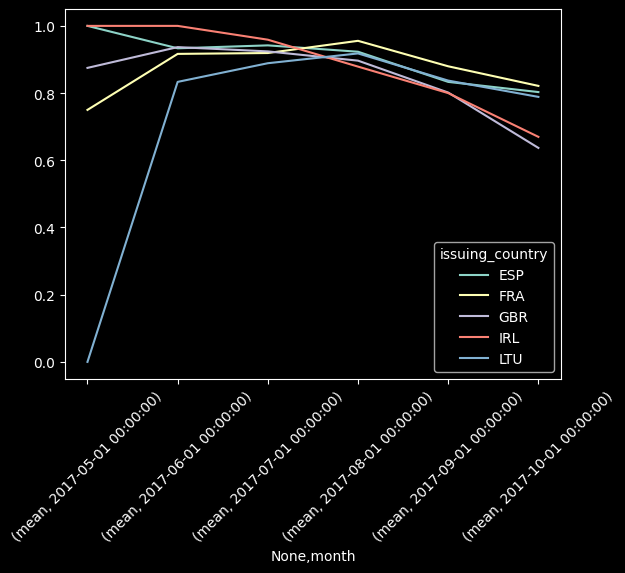

In [111]:
(df[df['issuing_country'].isin(df['issuing_country'].value_counts().head(5).index)]
 .pivot_table(index='issuing_country',columns='month',values='pass_rate',aggfunc=['mean'])).T.plot(rot=45)

<AxesSubplot: xlabel='None,month'>

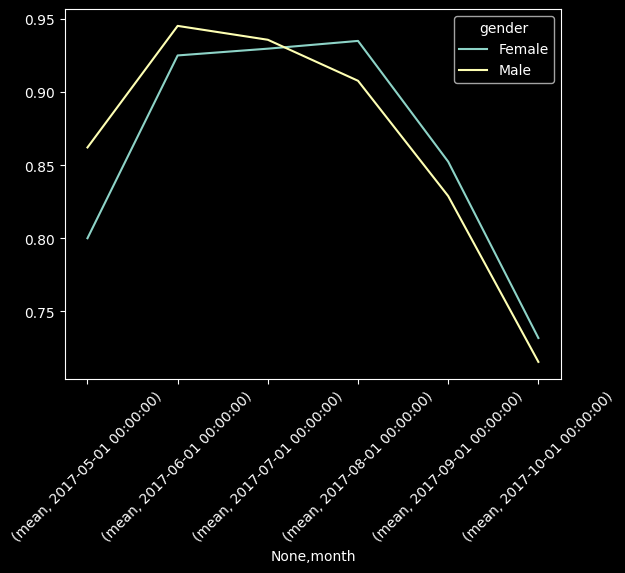

In [112]:
df.pivot_table(index='gender',columns='month',values='pass_rate',aggfunc=['mean']).T.plot(rot=45)

In [113]:
df

,Unnamed: 0_d,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,...,month,pass_rate,gender,document_type,date_of_expiry,issuing_country,nationality,issuing_date,issuing_state,document_version
0,27241,8190909e566647a5b6afeee9b4ec6c6a,1,1.0,1,1.0,1,2017-05-25 08:38:56,1,NaN,...,2017-05-01,0,Female,driving_licence,2023-12-05,GBR,NaN,NaN,NaN,NaN
1,28369,6b62136dfde348a99855e350294aaf5d,1,1.0,1,1.0,1,2017-05-31 08:12:51,1,NaN,...,2017-05-01,1,Male,driving_licence,2020-05-13,GBR,NaN,NaN,NaN,NaN
2,27988,73679363dccc46fa9f34a4fefd0d76e3,1,1.0,1,1.0,1,2017-05-29 15:07:04,1,NaN,...,2017-05-01,0,Male,passport,2023-11-15,GBR,GBR,NaN,NaN,NaN
3,27529,07857065dfa64db386739ec4fff47856,0,1.0,1,1.0,1,2017-05-26 19:00:35,1,NaN,...,2017-05-01,0,Male,passport,2021-01-27,PER,PER,NaN,NaN,NaN
4,47987,9f887805b2af49069349ff107e0bca01,1,1.0,1,1.0,1,2017-05-29 14:38:21,1,NaN,...,2017-05-01,1,Male,national_identity_card,NaN,FRA,NaN,2011-03,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,80036,694894c1934646268e2502093c583849,1,1.0,1,1.0,1,2017-10-04 13:41:55,1,1.0,...,2017-10-01,1,NaN,driving_licence,2023-10-25,LTU,NaN,2013-10-25,NaN,NaN
5876,68019,b4c2ec7f7b18454eba27d6fa0e971bf9,0,NaN,0,NaN,unidentified,2017-10-25 11:36:18,1,NaN,...,2017-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5877,5896,ff977fd9fe9b4de7aff2548f2a27380b,1,1.0,1,1.0,1,2017-10-29 15:07:49,1,1.0,...,2017-10-01,1,Male,driving_licence,2025-06-02,GBR,NaN,2015-06-03,NaN,NaN
5878,21409,997332eae0cc4becbdb14239c93ec38a,1,1.0,1,1.0,1,2017-10-09 14:37:46,1,1.0,...,2017-10-01,1,Male,national_identity_card,2027-09-28,POL,POL,NaN,NaN,NaN


In [114]:
df.isna().mean()

Unnamed: 0_d                          0.000000
user_id                               0.000000
result_d                              0.000000
visual_authenticity_result_d          0.149587
image_integrity_result                0.000000
face_detection_result                 0.149759
image_quality_result                  0.000000
created_at_d                          0.000000
supported_document_result             0.001891
conclusive_document_quality_result    0.464580
colour_picture_result                 0.464580
data_validation_result                0.192228
data_consistency_result               0.484869
data_comparison_result                0.985385
attempt_id                            0.000000
police_record_result                  0.183631
compromised_document_result           0.739856
properties_d                          0.000000
sub_result                            0.000000
Unnamed: 0_f                          0.000000
result_f                              0.000000
face_comparis

In [115]:
df

,Unnamed: 0_d,user_id,result_d,visual_authenticity_result_d,image_integrity_result,face_detection_result,image_quality_result,created_at_d,supported_document_result,conclusive_document_quality_result,...,month,pass_rate,gender,document_type,date_of_expiry,issuing_country,nationality,issuing_date,issuing_state,document_version
0,27241,8190909e566647a5b6afeee9b4ec6c6a,1,1.0,1,1.0,1,2017-05-25 08:38:56,1,NaN,...,2017-05-01,0,Female,driving_licence,2023-12-05,GBR,NaN,NaN,NaN,NaN
1,28369,6b62136dfde348a99855e350294aaf5d,1,1.0,1,1.0,1,2017-05-31 08:12:51,1,NaN,...,2017-05-01,1,Male,driving_licence,2020-05-13,GBR,NaN,NaN,NaN,NaN
2,27988,73679363dccc46fa9f34a4fefd0d76e3,1,1.0,1,1.0,1,2017-05-29 15:07:04,1,NaN,...,2017-05-01,0,Male,passport,2023-11-15,GBR,GBR,NaN,NaN,NaN
3,27529,07857065dfa64db386739ec4fff47856,0,1.0,1,1.0,1,2017-05-26 19:00:35,1,NaN,...,2017-05-01,0,Male,passport,2021-01-27,PER,PER,NaN,NaN,NaN
4,47987,9f887805b2af49069349ff107e0bca01,1,1.0,1,1.0,1,2017-05-29 14:38:21,1,NaN,...,2017-05-01,1,Male,national_identity_card,NaN,FRA,NaN,2011-03,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,80036,694894c1934646268e2502093c583849,1,1.0,1,1.0,1,2017-10-04 13:41:55,1,1.0,...,2017-10-01,1,NaN,driving_licence,2023-10-25,LTU,NaN,2013-10-25,NaN,NaN
5876,68019,b4c2ec7f7b18454eba27d6fa0e971bf9,0,NaN,0,NaN,unidentified,2017-10-25 11:36:18,1,NaN,...,2017-10-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5877,5896,ff977fd9fe9b4de7aff2548f2a27380b,1,1.0,1,1.0,1,2017-10-29 15:07:49,1,1.0,...,2017-10-01,1,Male,driving_licence,2025-06-02,GBR,NaN,2015-06-03,NaN,NaN
5878,21409,997332eae0cc4becbdb14239c93ec38a,1,1.0,1,1.0,1,2017-10-09 14:37:46,1,1.0,...,2017-10-01,1,Male,national_identity_card,2027-09-28,POL,POL,NaN,NaN,NaN


In [116]:
df.pivot_table(index='document_type',columns='month',values='pass_rate',aggfunc=['count','mean'])

count                                              \
month                  2017-05-01 2017-06-01 2017-07-01 2017-08-01 2017-09-01   
document_type                                                                   
driving_licence              21.0       95.0      365.0      326.0      322.0   
national_identity_card       18.0       87.0      342.0      365.0      389.0   
passport                     19.0       87.0      304.0      338.0      276.0   
residence_permit              NaN        NaN       16.0       28.0       34.0   

                                        mean                                   \
month                  2017-10-01 2017-05-01 2017-06-01 2017-07-01 2017-08-01   
document_type                                                                   
driving_licence             551.0   0.857143   0.884211   0.917808   0.898773   
national_identity_card      549.0   0.777778   0.919540   0.938596   0.934247   
passport                    395.0   0.842105   0.954023   0.921053   0.899408   
residence_permit             18.0        NaN        NaN   0.937500   0.964286   

                                              
month                  2017-09-01 2017-10-01  
document_type                                 
driving_licence          0.850932   0.754991  
national_identity_card   0.868895   0.834244  
passport                 0.811594   0.620253  
residence_permit         0.882353   0.722222

In [117]:
(df.pivot_table(index='document_type',columns='month',values='pass_rate',aggfunc=['mean']).style
.highlight_between(left=0, right=0.75, subset='mean', color='red' )
.highlight_between(left=0.75, right=0.9, subset='mean', color='orange' )
.highlight_between(left=0.9, right=1, subset='mean', color='green' )
.format({
    'mean': '{:,.2%}'.format,
    'count': '{:,.1f}'
}))

<AxesSubplot: xlabel='None,month'>

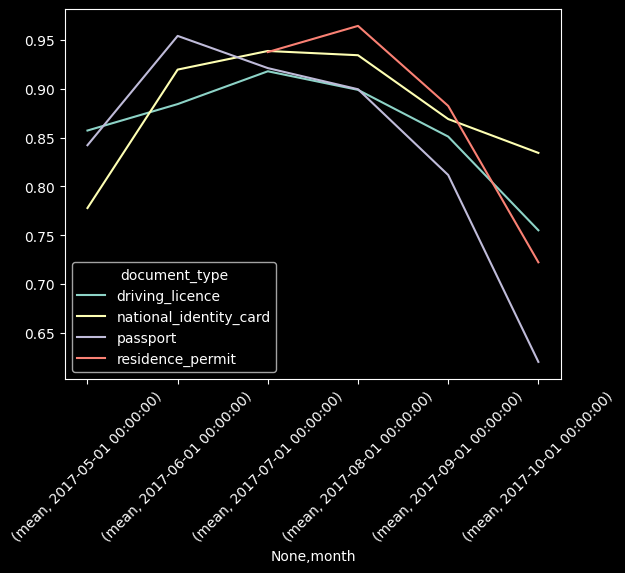

In [118]:
df.pivot_table(index='document_type',columns='month',values='pass_rate',aggfunc=['mean']).T.plot(rot=45)

In [119]:
top10_countries = df['issuing_country'].value_counts().head(10).index

In [120]:
(df[df['issuing_country'].isin(df['issuing_country'].value_counts().head(5).index)]
 .pivot_table(index='issuing_country',columns='month',values='pass_rate',aggfunc=['count','mean']))

count                                              \
month           2017-05-01 2017-06-01 2017-07-01 2017-08-01 2017-09-01   
issuing_country                                                          
ESP                      4         15         69         91         78   
FRA                      8         36        161        180        158   
GBR                     24         95        303        261        247   
IRL                      3         12         73         66         50   
LTU                      1         12         45         61         86   

                                 mean                                   \
month           2017-10-01 2017-05-01 2017-06-01 2017-07-01 2017-08-01   
issuing_country                                                          
ESP                     66      1.000   0.933333   0.942029   0.923077   
FRA                    252      0.750   0.916667   0.919255   0.955556   
GBR                    369      0.875   0.936842   0.924092   0.896552   
IRL                    109      1.000   1.000000   0.958904   0.878788   
LTU                    194      0.000   0.833333   0.888889   0.918033   

                                       
month           2017-09-01 2017-10-01  
issuing_country                        
ESP               0.833333   0.803030  
FRA               0.879747   0.821429  
GBR               0.801619   0.636856  
IRL               0.800000   0.669725  
LTU               0.837209   0.788660

<AxesSubplot: xlabel='None,month'>

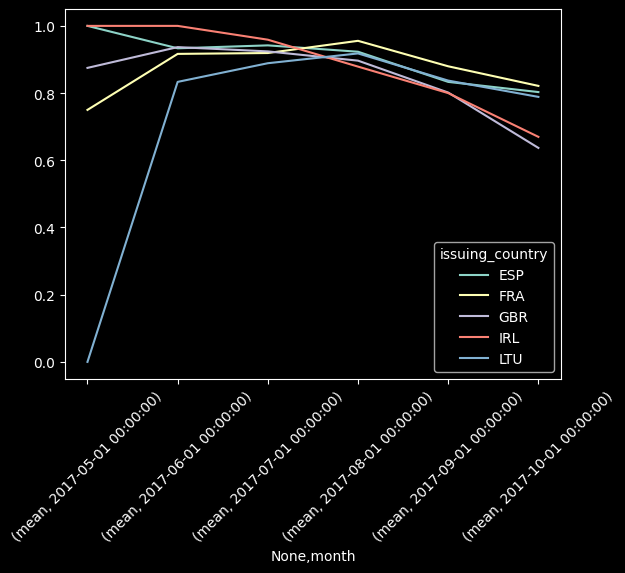

In [121]:
(df[df['issuing_country'].isin(df['issuing_country'].value_counts().head(5).index)]
 .pivot_table(index='issuing_country',columns='month',values='pass_rate',aggfunc=['mean'])).T.plot(rot=45)

<AxesSubplot: xlabel='None,month'>

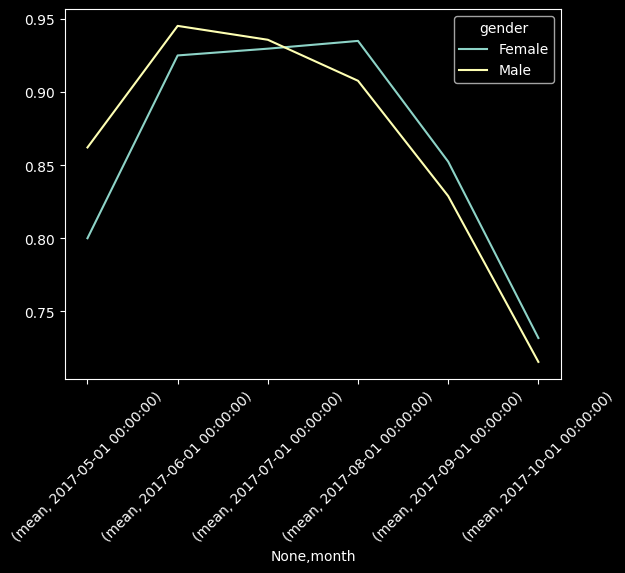

In [122]:
df.pivot_table(index='gender',columns='month',values='pass_rate',aggfunc=['mean']).T.plot(rot=45)